# **K-means Clustering - Small Example**


---

## Functions
* `kmeans()`
* `scale()`

<br>

---

## `mtcars` dataset

In [ ]:
# store mtcars data as dat
dat <- mtcars

head(dat)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


<br>

Quick example on clustering by horsepower and quarter-mile time

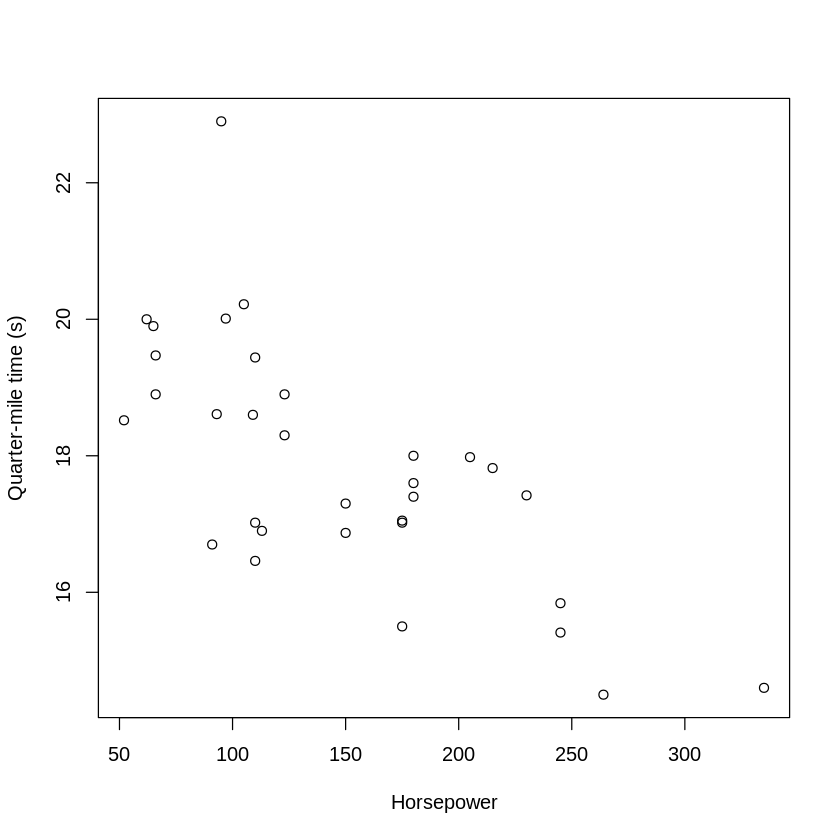

In [ ]:
plot(dat$hp, dat$qsec, 
     xlab = "Horsepower",
     ylab = "Quarter-mile time (s)")

<br>

Euclidean distance is sensitive to scaling, therefore, we must transform all our variables to the same scale

In [ ]:
# scale each variable to standard deviation 1
mat <- scale(dat)

head(mat)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.610399567,-0.7771651,-0.8680278,1.1899014,0.4235542,0.7352031
Mazda RX4 Wag,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.349785269,-0.4637808,-0.8680278,1.1899014,0.4235542,0.7352031
Datsun 710,0.4495434,-1.2248578,-0.99018209,-0.7830405,0.4739996,-0.917004624,0.4260068,1.1160357,1.1899014,0.4235542,-1.1221521
Hornet 4 Drive,0.2172534,-0.1049878,0.22009369,-0.5350928,-0.9661175,-0.002299538,0.8904872,1.1160357,-0.8141431,-0.9318192,-1.1221521
Hornet Sportabout,-0.2307345,1.0148821,1.04308123,0.4129422,-0.8351978,0.227654255,-0.4637808,-0.8680278,-0.8141431,-0.9318192,-0.5030337
Valiant,-0.3302874,-0.1049878,-0.04616698,-0.6080186,-1.5646078,0.248094592,1.3269868,1.1160357,-0.8141431,-0.9318192,-1.1221521


In [ ]:
# scale changes class from dataframe to matrix
class(mat)

# standard deviations should all be the same
print(apply(mat, 2, sd))

[1] "matrix" "array"

 mpg  cyl disp   hp drat   wt qsec   vs   am gear carb 
   1    1    1    1    1    1    1    1    1    1    1 


<br>

#### K-means Clustering


Cluster using K = 2

In [ ]:
clust <- kmeans(mat[, c("hp", "qsec")], centers = 2, nstart = 25)

class(clust)

[1] "kmeans"

In [ ]:
clust

K-means clustering with 2 clusters of sizes 19, 13

Cluster means:
          hp       qsec
1  0.5687730 -0.6402068
2 -0.8312837  0.9356868

Clustering vector:
          Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
                  1                   1                   2                   2 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
                  1                   2                   1                   2 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
                  2                   2                   2                   1 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
                  1                   1                   1                   1 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
                  1                   2                   2                   2 
      Toyota Corona    Dodge Ch

<br>

Visualize clusters

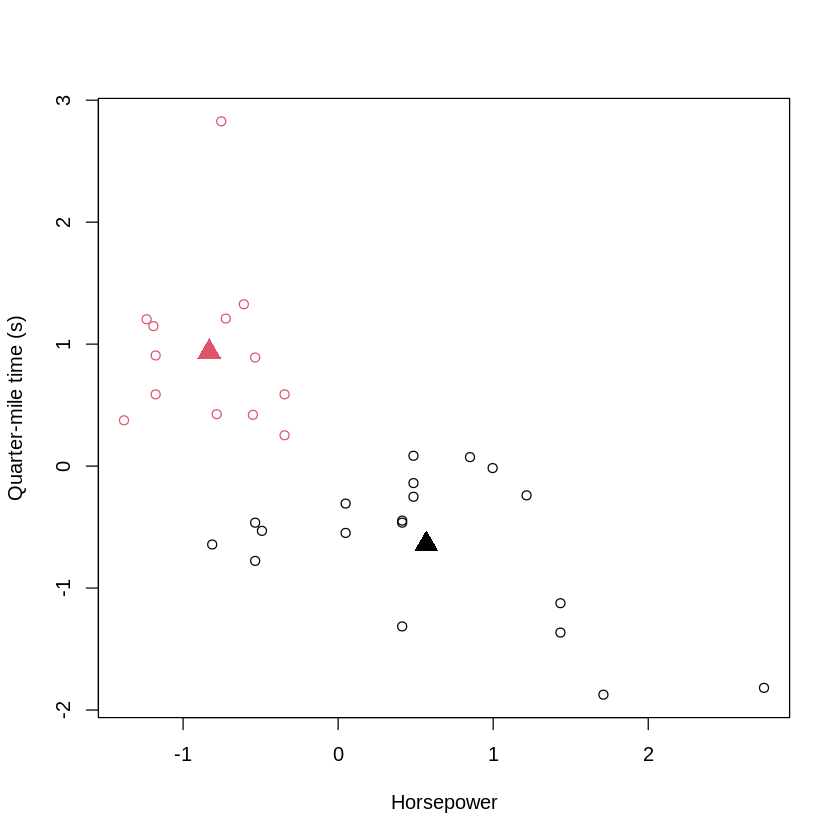

In [ ]:
plot(mat[,"hp"], mat[,"qsec"], col = clust$cluster, 
     xlab = "Horsepower",
     ylab = "Quarter-mile time (s)")
points(clust$centers, col = 1:2, pch = 17, cex = 2)

<br>

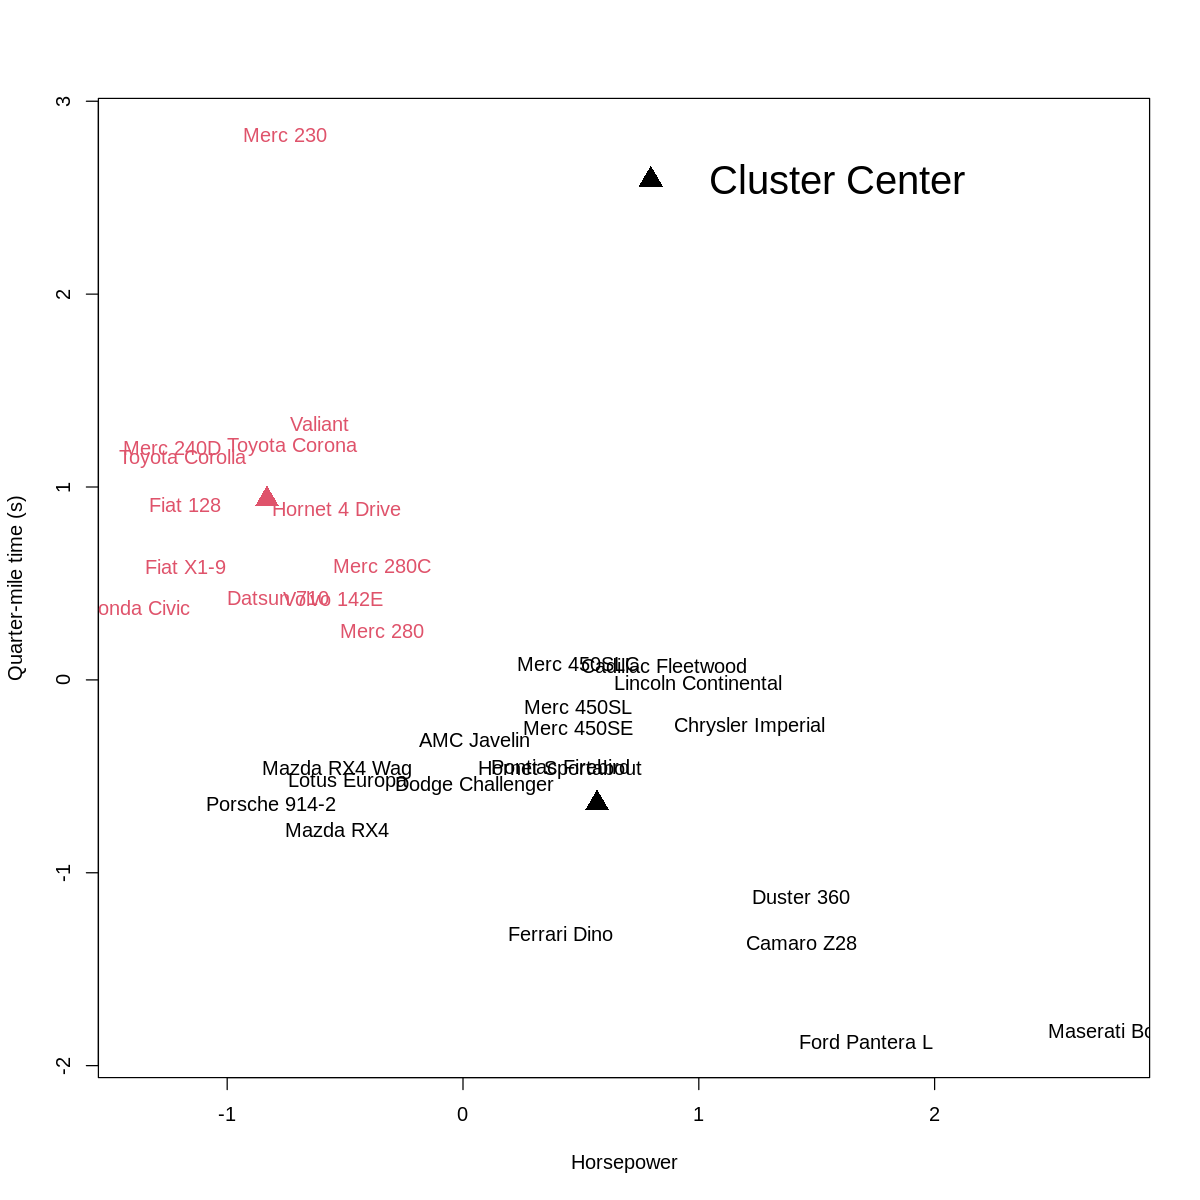

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)

plot(mat[,"hp"], mat[,"qsec"], col = NA, 
     xlab = "Horsepower",
     ylab = "Quarter-mile time (s)")
text(mat[,"hp"], mat[,"qsec"], rownames(dat), col = clust$cluster)
points(clust$centers, col = 1:3, pch = 17, cex = 2)

legend("topright", "Cluster Center", pch = 17, bty = "n", cex = 2)

<br>

Choose number of clusters using elbow plot

In [ ]:
within_var <- c()

# loop through numbers of clusters
for (nb_clust in 1:20) {

  # run kmeans
  clust <- kmeans(mat[, c("hp", "qsec")], 
                  centers = nb_clust, 
                  nstart = 25)

  # store total within cluster variation
  within_var <- c(within_var, clust$tot.withinss)
}

In [ ]:
print(within_var)

 [1] 62.0000000 27.7009676 15.4234768 11.3050893  7.4732941  5.9716169
 [7]  4.6302482  3.5056957  2.7220312  1.9634834  1.6542132  1.2086160
[13]  1.0728343  0.9680044  0.6853862  0.5787740  0.4988330  0.4496905
[19]  0.3218805  0.3263326


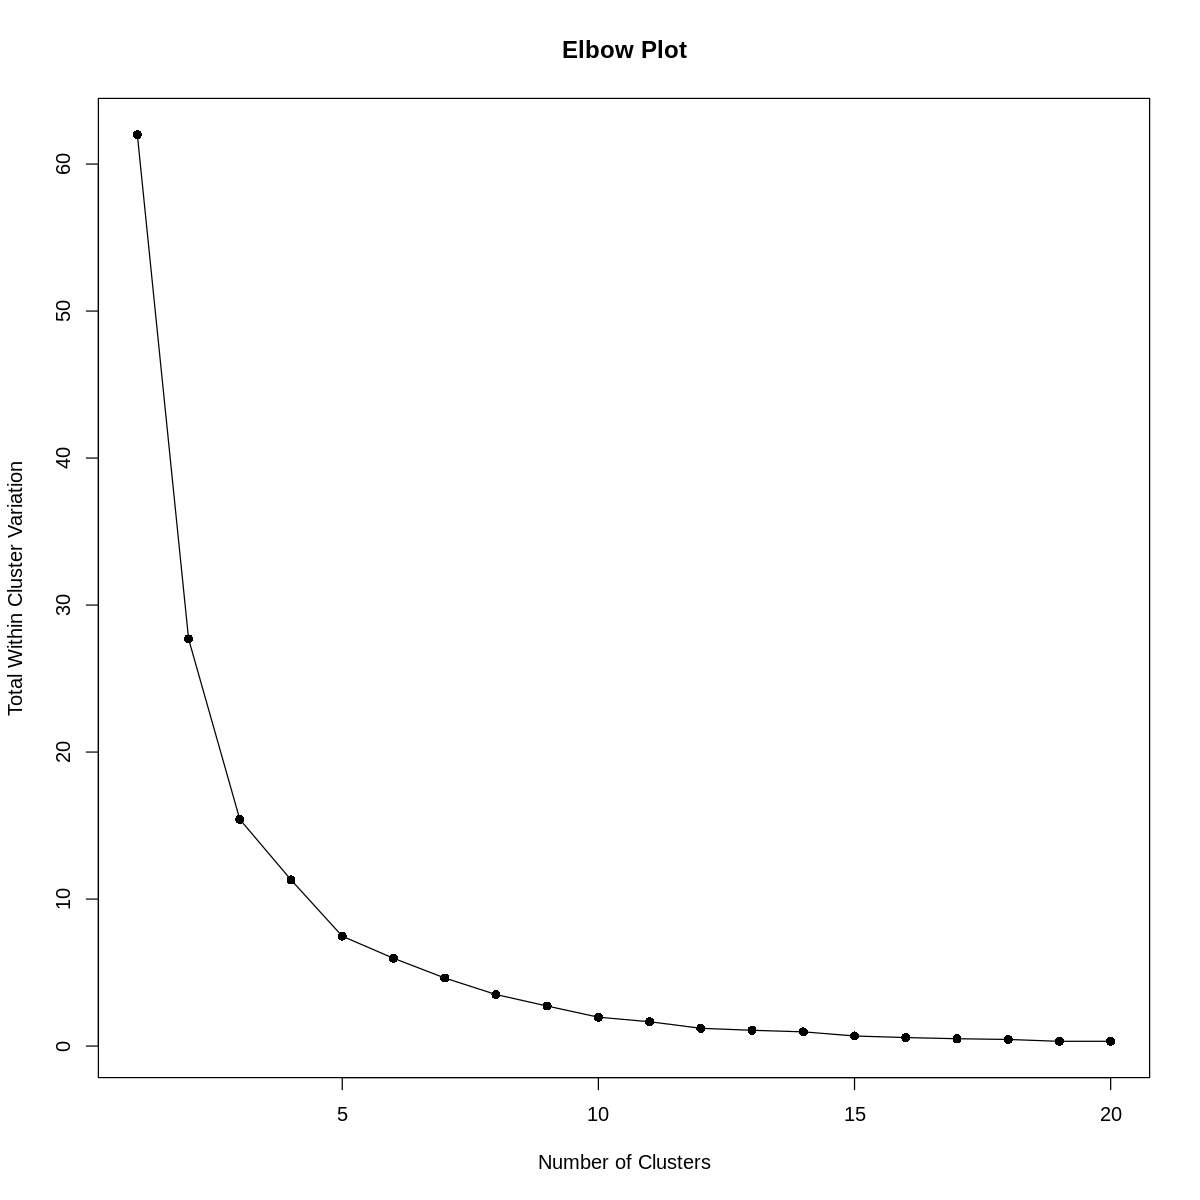

In [ ]:
plot(1:20, within_var, type = "o", pch = 16,
     xlab = "Number of Clusters",
     ylab = "Total Within Cluster Variation",
     main = "Elbow Plot")

<br>

Final Clustering

In [ ]:
clust <- kmeans(mat[, c("hp", "qsec")], centers = 5, nstart = 25)

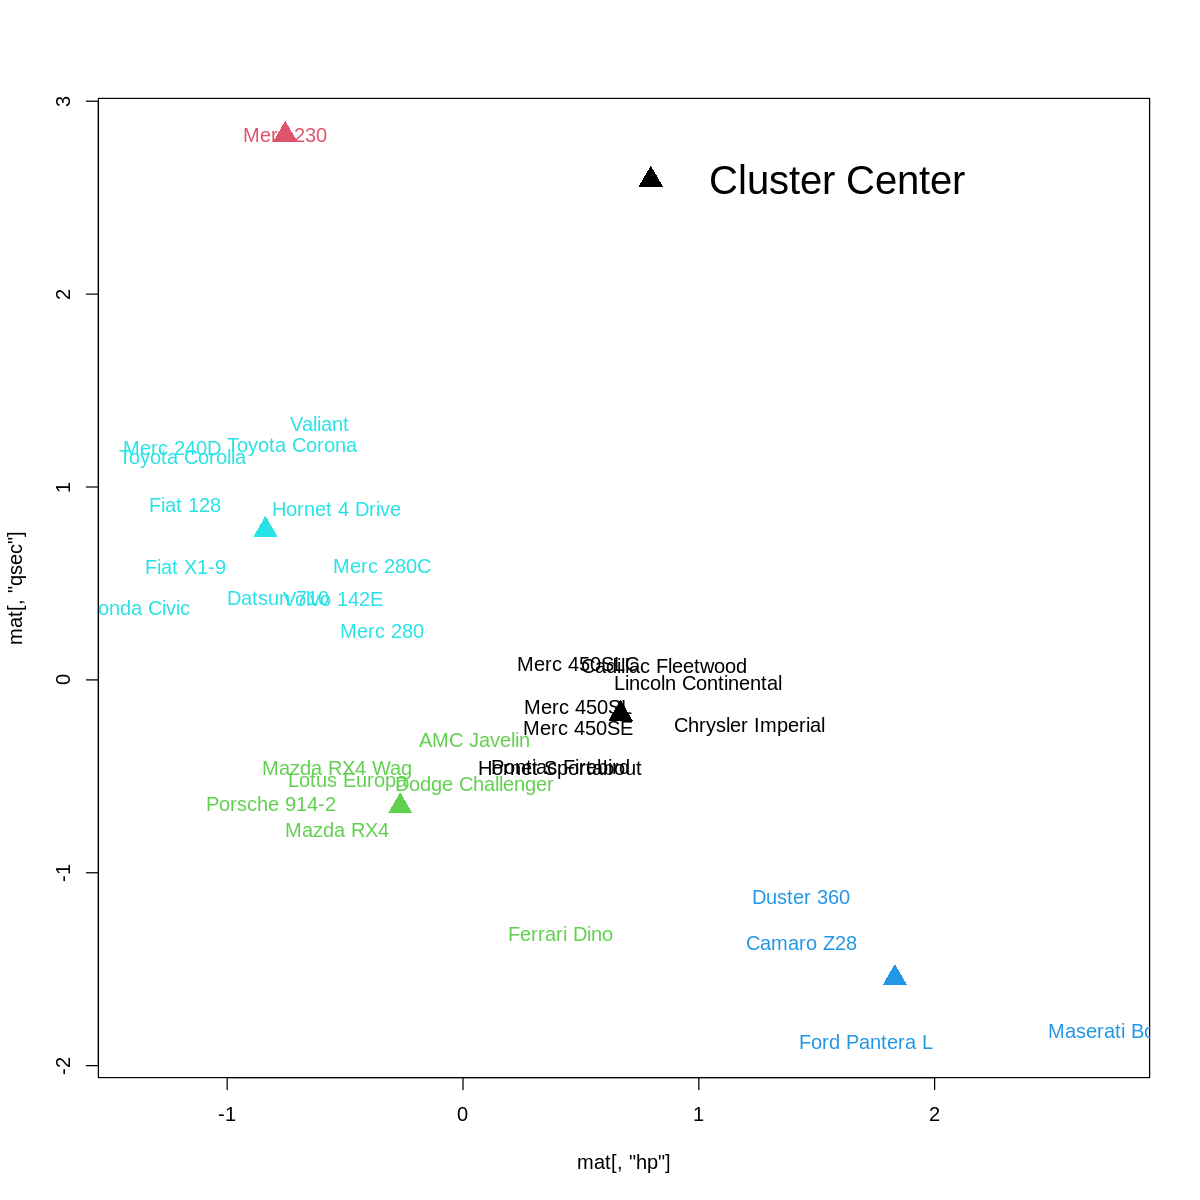

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)

plot(mat[,"hp"], mat[,"qsec"], col = NA)
text(mat[,"hp"], mat[,"qsec"], rownames(dat), col = clust$cluster)
points(clust$centers, col = 1:5, pch = 17, cex = 2)

legend("topright", "Cluster Center", pch = 17, bty = "n", cex = 2)

In [ ]:
cluster_list <- list()
for (ii in 1:5) {
  cluster_list[[ii]] <- names(clust$cluster)[clust$cluster == ii]
}

cluster_list

[[1]]
[1] "Hornet Sportabout"   "Merc 450SE"          "Merc 450SL"         
[4] "Merc 450SLC"         "Cadillac Fleetwood"  "Lincoln Continental"
[7] "Chrysler Imperial"   "Pontiac Firebird"   

[[2]]
[1] "Merc 230"

[[3]]
[1] "Mazda RX4"        "Mazda RX4 Wag"    "Dodge Challenger" "AMC Javelin"     
[5] "Porsche 914-2"    "Lotus Europa"     "Ferrari Dino"    

[[4]]
[1] "Duster 360"     "Camaro Z28"     "Ford Pantera L" "Maserati Bora" 

[[5]]
 [1] "Datsun 710"     "Hornet 4 Drive" "Valiant"        "Merc 240D"     
 [5] "Merc 280"       "Merc 280C"      "Fiat 128"       "Honda Civic"   
 [9] "Toyota Corolla" "Toyota Corona"  "Fiat X1-9"      "Volvo 142E"

<br>

## Exercise

* Try running the clustering above using more than two variables
* What is the optimal number of clusters?
* What patterns do you observe within the clusters? Use the types of cars and the cluster means